In [30]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import asarray as ar, exp
%matplotlib inline
import cv2 as cv
import numpy as np


In [31]:
def increase_brightness(img, value=30):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv.merge((h, s, v))
    img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    return img

In [72]:
img = cv.imread("group.jpg")
bright = increase_brightness(img,50)
gray = cv.cvtColor(bright,cv.COLOR_BGR2GRAY)

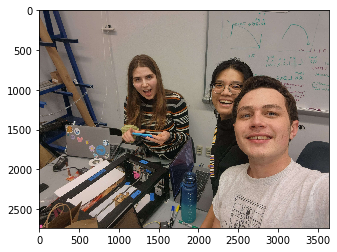

In [73]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb)

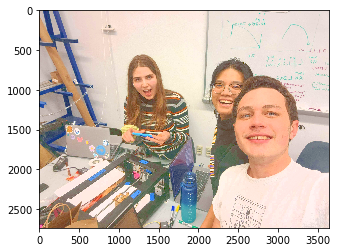

In [74]:
bright = increase_brightness(rgb,80)
plt.imshow(bright)

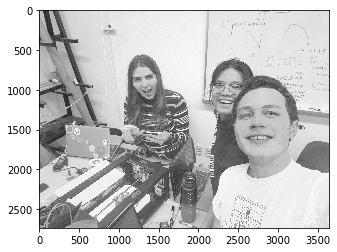

In [75]:
gray = cv.cvtColor(bright, cv.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

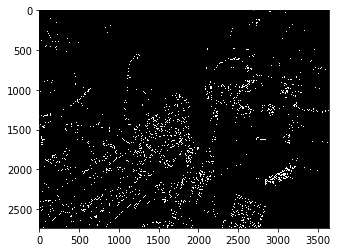

In [76]:
edges1 = cv.Canny(rgb, 0, 255)
plt.imshow(edges1,cmap='gray')

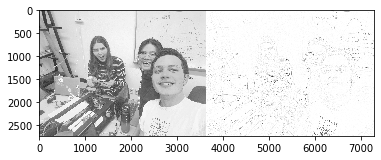

In [100]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (55,55))
dilated = cv.morphologyEx(gray, cv.MORPH_DILATE, kernel)
diff1 = 255-cv.subtract(dilated, gray)

median = cv.medianBlur(diff1,25)
diff2 = 255 - cv.subtract(median, diff1)

normed = cv.normalize(diff2, None, 0, 255, cv.NORM_MINMAX)

dst = np.hstack((gray, normed))
plt.imshow(dst, cmap='gray')
plt.show()


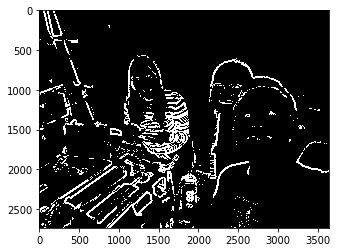

In [102]:
thresh = cv.threshold(diff1, 150, 255, cv.THRESH_BINARY_INV)[1]
plt.imshow(thresh,cmap='gray')

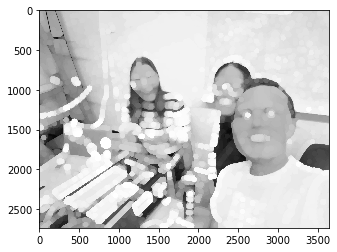

In [93]:
plt.imshow(dilated,cmap='gray')

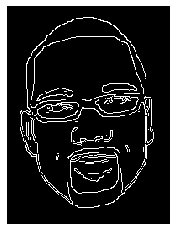

In [32]:
thresh = cv.Canny(img,150,200)
plt.axis("off")

plt.imshow(thresh,cmap='gray')

In [33]:
# img_copy = img.copy()
# lines = cv.HoughLines(thresh, 1, np.pi / 180, 150, None, 40, 50)

# if lines is not None:
#     for i in range(0, len(lines)):
#         rho = lines[i][0][0]
#         theta = lines[i][0][1]
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
#         cv.line(img_copy, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
# plt.imshow(img_copy)

In [34]:
# img_copy = img.copy()
# imgLines = cv.HoughLinesP(normed,1,np.pi/180,threshold=2,minLineLength=50,maxLineGap=50)
# for line in imgLines:
#     x1,y1,x2,y2 = line[0]
#     cv.line(img_copy, (x1,y1),(x2,y2), (0,255,0),1)

# plt.imshow(img_copy)
# plt.show()

In [35]:
cnt = 0
total = 0
for i in range(len(thresh)):
    for j in range(len(thresh[0])):
        total += 1
        if thresh[i][j] != 0:
            cnt += 1
 
print(cnt, total)

3234 50246


In [36]:
indices = np.where(thresh != 0)
    # coordinates = zip(indices[0],indices[1])

In [37]:
np.shape(indices[0])

(3234,)

In [267]:
np.shape(indices)

(2, 3234)

In [155]:
from scipy.optimize import curve_fit
from numpy import asarray as ar, exp

In [268]:
def group_coord(coordinates):
    #find curves by grouping index, and then fit curve
    prev = [coordinates[0][0], coordinates[1][0]]
    groups = [[prev]]
    for i in range(1,len(coordinates[0])):
        x = coordinates[0][i]
        y = coordinates[1][i]
        if abs(x-prev[0]) > 10 or abs(y-prev[1]) > 10:
            groups.append([])
        groups[-1].append([x,y])
        prev = [x,y]
    new_groups = []
    for g in groups:
        x_list = [x for x,_ in g]
        y_list = [y for _,y in g]
        new_groups.append([x_list, y_list])


    return new_groups,groups


In [269]:
coordinates,points = group_coord(indices)
# longest_index = max(enumerate(points), key=lambda x:len(x[1]))[0]
# tmp = np.asarray(points[longest_index])


In [270]:
#points is in (x,y)
#coordinates is in x and y
# bed size x: 1-1000, y: 1-500
bed_x = 800
bed_y = 400

In [159]:
# scale the image to bed size

largest_x_range = max(indices[0]) - min(indices[0])
largest_y_range = max(indices[1]) - min(indices[1])



(226, 159)

In [280]:
def find_scale(x,y):
    
    x_scale = (max(x) - min(x))/bed_x
    y_scale = (max(y) - min(y))/bed_y
    if x_scale < 1 and y_scale < 1:
        # if image is larger, we need to make smaller
        scale_size = max(x_scale,y_scale)
    elif x_scale > 1 and y_scale > 1:
        # image is too small, we need to make it larger
        scale_size = max(x_scale, y_scale)
    elif x_scale < 1:
        # y is too large, we need to scale down by y
        scale_size = y_scale
    else:
        # x is too large, scale down by x
        scale_size = x_scale
    return scale_size

In [281]:
def scale_image(x_lst,y_lst,scale):
    return [x/scale for x in x_lst], [y/scale for y in y_lst]

In [273]:
def generate_gcode(x,y):
    # make the start G1 Z0
    
    command_list = ["G1 Z1;"]
    for i in range(len(x)):
        command_list += ["G1 X"+str(x[i]) + " Y"+str(y[i]) +";"]
    command_list.append("G1 Z0;")
    return command_list

In [39]:
canvas = np.ones((len(img[0]),len(img[1]),3), np.uint8)*255

In [40]:
cv.drawContours(canvas,contours, -1, (255,0,0), -1)
plt.imshow(canvas)

NameError: name 'contours' is not defined

In [286]:
coordinates[13]

[[20], [68]]

In [257]:
# # read coordinate from file
# filename = "butter_fly_original.txt"
# file = open(filename,"r")
# lines = file.readlines()
# coords = []
# for line in lines:
#     sep = line.replace("(","").replace(")","").replace("\n","").split(",")
#     coord = [int(num) for num in sep]
#     coords.append(coord)


In [ ]:
canvas = np.ones((len(img[0]),img[1],3), np.uint8)*255

In [299]:
len(img[0])
len(img[1])


194

In [287]:
G_code = []
scale = find_scale(indices[0],indices[1])
for group in coordinates:
    
    group[0] = [group[0][i] for i in range(0,len(group[0]))]
    group[1] = [group[1][i] for i in range(0,len(group[1]))]

    resized_x, resized_y = scale_image(group[0], group[1], scale)
    commands = generate_gcode(resized_x, resized_y)
    G_code+= commands

    

In [294]:
with open("amon.svg", "w+") as f:
    f.write(f'<svg width="{400}" height="{800}" xmlns="http://www.w3.org/2000/svg">')

    for c in contours:
        f.write('<path d="M')
        for i in range(len(c)):
            x, y = c[i][0]
            f.write(f"{x} {y} ")
        f.write('" style="stroke:pink"/>')
    f.write("</svg>")

In [289]:
len(G_code)

2355

In [290]:
write_filename = "amaon.gcode"
f = open(write_filename, "w")
for command in G_code:
    f.write(command)
    f.write("\n")
f.close()

In [96]:
# find the a & b points
def get_bezier_coef(points):
    # since the formulas work given that we have n+1 points
    # then n must be this:
    n = len(points) - 1

    # build coefficents matrix
    C = 4 * np.identity(n)
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2

    # build points vector
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # solve system, find a & b
    A = np.linalg.solve(C, P)
    B = [0] * n
    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]
    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B

# returns the general Bezier cubic formula given 4 control points
def get_cubic(a, b, c, d):
    return lambda t: np.power(1 - t, 3) * a + 3 * np.power(1 - t, 2) * t * b + 3 * (1 - t) * np.power(t, 2) * c + np.power(t, 3) * d

# return one cubic curve for each consecutive points
def get_bezier_cubic(points):
    A, B = get_bezier_coef(points)
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]
def get_control_points(points):
    lst = []
    A, B = get_bezier_coef(points)
    for i in range(0,len(points)-1,5):
        lst.append([points[i],A[i],B[i],points[i+1]])
    return lst

# evalute each cubic curve on the range [0, 1] sliced in n points
def evaluate_bezier(points, n):
    curves = get_bezier_cubic(points)
    return np.array([fun(t) for fun in curves for t in np.linspace(0, 1, n)])

In [97]:
longest_index = max(enumerate(points), key=lambda x:len(x[1]))[0]
tmp = np.asarray(points[longest_index])


In [98]:
lst = get_control_points(tmp)

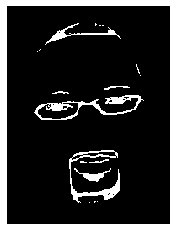

In [313]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
img_copy = img.copy()
cv.drawContours(thresh, contours, -1, (0, 255, 0), 3)
plt.axis("off")
plt.imshow(thresh,cmap='gray')

In [252]:
groups = []
for cnt in contours:
    approx = cv.approxPolyDP(cnt, 0.009 * cv.arcLength(cnt, True), True) 
    n = approx.ravel() 
    groups.append(n)


In [253]:
coordinates = []
for group in groups:
    x = list(group[:len(group)//2])
    y = list(group[len(group)//2:])
    coordinates.append([x,y])


In [254]:
full_points = [x[0] for x in groups],[y[1] for y in groups]

In [99]:
commands = []
for line in points:
    if len(line) < 4:
        continue
    line = np.asarray(line)
    curve = get_control_points(line)
        
    starting_point = [["M"] + ["{:.2f}".format(l) for l in line[0]]]
    curve_command = []
    for c in curve:
        curve_command.append(["C"]+["{:.2f}".format(elem) for p in c[1:] for elem in p])
    commands += (starting_point + curve_command)

In [80]:
list(np.shape(gray))

[237, 193]

In [101]:
import svg_test
import bezier_fit

write_file = "edge.gcode"
var1 =1
#clear the write file
with open(write_file,"w") as f:
    var1 = 0


bed_dimensions = [1790,914]

viewBox = [0,0] + list(np.shape(gray))
# command_list,viewBox = svg_test.parse_svg(test_file)
#figure out the weird bug with the last point being null
print()
scalers = svg_test.find_scale(viewBox,bed_dimensions,max_scale=1,stretch_scale=True)

print(scalers)
bezier_fit.svg_commands_to_gcode(write_file,[0,0],commands,scalers,0)


[1, 1]


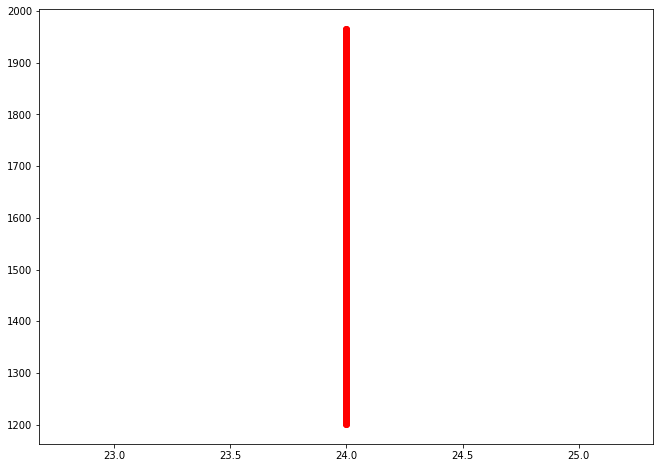

In [131]:
points = tmp

# fit the points with Bezier interpolation
# use 50 points between each consecutive points to draw the curve
curves, path = evaluate_bezier(points, 4)

# extract x & y coordinates of points
x, y = points[:,0], points[:,1]
px, py = path[:,0], path[:,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(px, py, 'b-')
plt.plot(x, y, 'ro')
plt.show()

In [126]:
print(len(points))
len(path)

766


3060

In [109]:
import bezier

In [119]:
curve = bezier.Curve.from_nodes(coordinates[91])

In [121]:
curve.reduce_()

UnsupportedDegree: The only degrees supported at this time are 1, 2, 3 and 4 (degree=765)

In [28]:
curve.elevate()

<Curve (degree=2, dimension=766)>

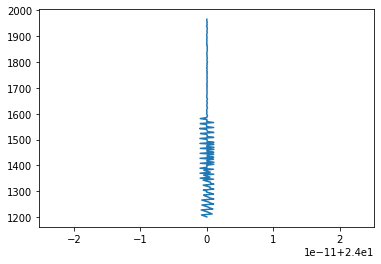

In [118]:
curve.plot(num_pts=200)

In [55]:
help(curve)

Help on Curve in module bezier.curve object:

class Curve(bezier._base.Base)
 |  Curve(nodes, degree, *, copy=True, verify=True)
 |  
 |  Represents a B |eacute| zier `curve`_.
 |  
 |  .. _curve: https://en.wikipedia.org/wiki/B%C3%A9zier_curve
 |  
 |  We take the traditional definition: a B |eacute| zier curve is a mapping
 |  from :math:`s \in \left[0, 1\right]` to convex combinations
 |  of points :math:`v_0, v_1, \ldots, v_n` in some vector space:
 |  
 |  .. math::
 |  
 |     B(s) = \sum_{j = 0}^n \binom{n}{j} s^j (1 - s)^{n - j} \cdot v_j
 |  
 |  .. image:: ../../images/curve_constructor.png
 |     :align: center
 |  
 |  .. doctest:: curve-constructor
 |  
 |     >>> import bezier
 |     >>> nodes = np.asfortranarray([
 |     ...     [0.0, 0.625, 1.0],
 |     ...     [0.0, 0.5  , 0.5],
 |     ... ])
 |     >>> curve = bezier.Curve(nodes, degree=2)
 |     >>> curve
 |     <Curve (degree=2, dimension=2)>
 |  
 |  .. testcleanup:: curve-constructor
 |  
 |     import make_images